In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import keras

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import zipfile
# Specify the path to the ZIP file
zip_file_path = '/content/drive/MyDrive/hurricane_damage.zip'

# Specify the directory where you want to extract the contents
extract_to_dir = '/content/'

# Create a ZipFile object
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract all contents to the specified directory
    zip_ref.extractall(extract_to_dir)

print(f"Files extracted to: {extract_to_dir}")

Files extracted to: /content/


### creating dataframe

In [4]:
image_dir_test=Path('/content/archive/test_another')
image_dir_train=Path('/content/archive/train_another')
image_dir_val=Path('/content/archive/validation_another')

filepaths_test= list(image_dir_test.glob(r'**/*.jpeg'))
filepaths_train= list(image_dir_train.glob(r'**/*.jpeg'))
filepaths_val= list(image_dir_val.glob(r'**/*.jpeg'))

labels_test=list(map(lambda x: os.path.split(os.path.split(x)[0])[1],filepaths_test))
labels_train=list(map(lambda x: os.path.split(os.path.split(x)[0])[1],filepaths_train))
labels_val=list(map(lambda x: os.path.split(os.path.split(x)[0])[1],filepaths_val))

In [5]:
filepaths_test=pd.Series(filepaths_test,name='Filepath').astype(str)
labels_test=pd.Series(labels_test,name='Label')
image_df_test=pd.concat([filepaths_test,labels_test],axis=1)
image_df_test

,Filepath,Label
0,/content/archive/test_another/damage/-96.89806...,damage
1,/content/archive/test_another/damage/-95.12056...,damage
2,/content/archive/test_another/damage/-95.57288...,damage
3,/content/archive/test_another/damage/-95.53566...,damage
4,/content/archive/test_another/damage/-95.08731...,damage
...,...,...
8995,/content/archive/test_another/no_damage/-95.07...,no_damage
8996,/content/archive/test_another/no_damage/-95.06...,no_damage
8997,/content/archive/test_another/no_damage/-95.63...,no_damage
8998,/content/archive/test_another/no_damage/-96.96...,no_damage


In [6]:
filepaths_train=pd.Series(filepaths_train,name='Filepath').astype(str)
labels_train=pd.Series(labels_train,name='Label')
image_df_train=pd.concat([filepaths_train,labels_train],axis=1)
image_df_train

,Filepath,Label
0,/content/archive/train_another/damage/-95.6288...,damage
1,/content/archive/train_another/damage/-95.6285...,damage
2,/content/archive/train_another/damage/-95.5943...,damage
3,/content/archive/train_another/damage/-95.6449...,damage
4,/content/archive/train_another/damage/-95.6494...,damage
...,...,...
9995,/content/archive/train_another/no_damage/-95.0...,no_damage
9996,/content/archive/train_another/no_damage/-95.2...,no_damage
9997,/content/archive/train_another/no_damage/-95.1...,no_damage
9998,/content/archive/train_another/no_damage/-95.6...,no_damage


In [7]:
filepaths_val=pd.Series(filepaths_val,name='Filepath').astype(str)
labels_val=pd.Series(labels_val,name='Label')
image_df_val=pd.concat([filepaths_val,labels_val],axis=1)
image_df_val

,Filepath,Label
0,/content/archive/validation_another/damage/-95...,damage
1,/content/archive/validation_another/damage/-95...,damage
2,/content/archive/validation_another/damage/-96...,damage
3,/content/archive/validation_another/damage/-95...,damage
4,/content/archive/validation_another/damage/-93...,damage
...,...,...
1995,/content/archive/validation_another/no_damage/...,no_damage
1996,/content/archive/validation_another/no_damage/...,no_damage
1997,/content/archive/validation_another/no_damage/...,no_damage
1998,/content/archive/validation_another/no_damage/...,no_damage


In [8]:
print(image_df_train.shape)
print(image_df_test.shape)
print(image_df_val.shape)

(10000, 2)
(9000, 2)
(2000, 2)


In [9]:
IMG_HEIGHT = 128
IMG_WIDTH = 128
IMAGE_SIZE = [IMG_HEIGHT,IMG_WIDTH]
BATCH_SIZE = 64
NUM_OF_CLASSES = 1
EPOCHS = 30

train_generator= keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
val_generator= keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_generator= keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_images=train_generator.flow_from_dataframe(
    dataframe=image_df_train,
    x_col='Filepath',
    y_col='Label',
    target_size=(IMG_HEIGHT,IMG_WIDTH),
    color_mode='rgb',
    class_mode='binary',
    batch_size=BATCH_SIZE,
    shuffle=True
)

val_images=val_generator.flow_from_dataframe(
    dataframe=image_df_val,
    x_col='Filepath',
    y_col='Label',
    target_size=(IMG_HEIGHT,IMG_WIDTH),
    color_mode='rgb',
    class_mode='binary',
    batch_size=BATCH_SIZE,
    shuffle=True
)

test_images=test_generator.flow_from_dataframe(
    dataframe=image_df_test,
    x_col='Filepath',
    y_col='Label',
    target_size=(IMG_HEIGHT,IMG_WIDTH),
    color_mode='rgb',
    class_mode='binary',
    batch_size=BATCH_SIZE,
    shuffle=False
)

Found 10000 validated image filenames belonging to 2 classes.
Found 2000 validated image filenames belonging to 2 classes.
Found 9000 validated image filenames belonging to 2 classes.


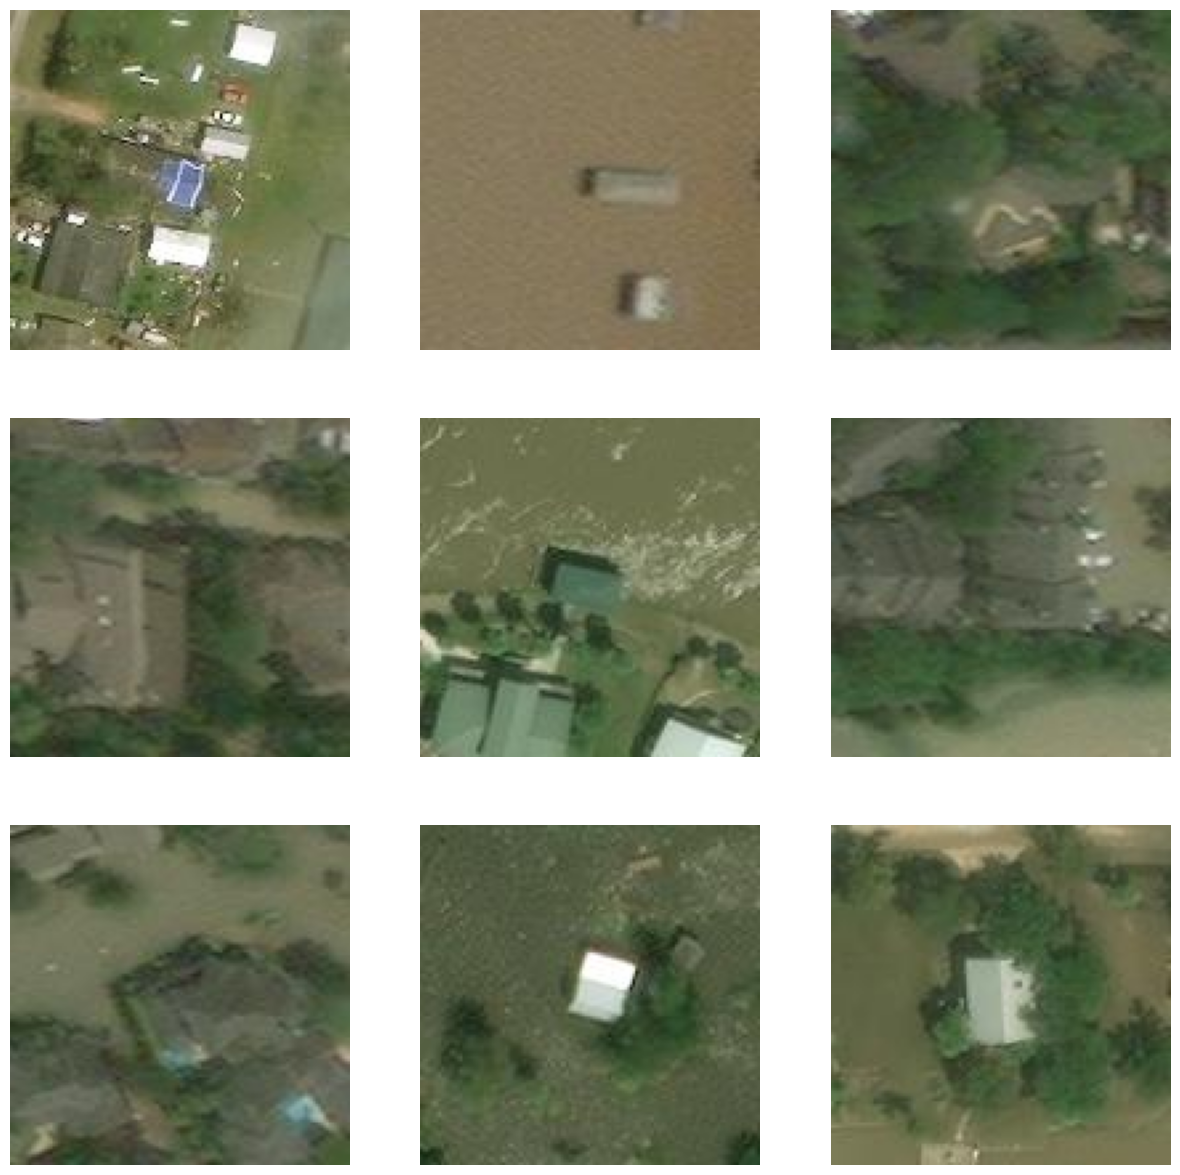

In [10]:
plt.figure(figsize=(15,15))
for images, labels in test_images:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        #plt.title(int(labels[i]))
        plt.axis("off")
    break

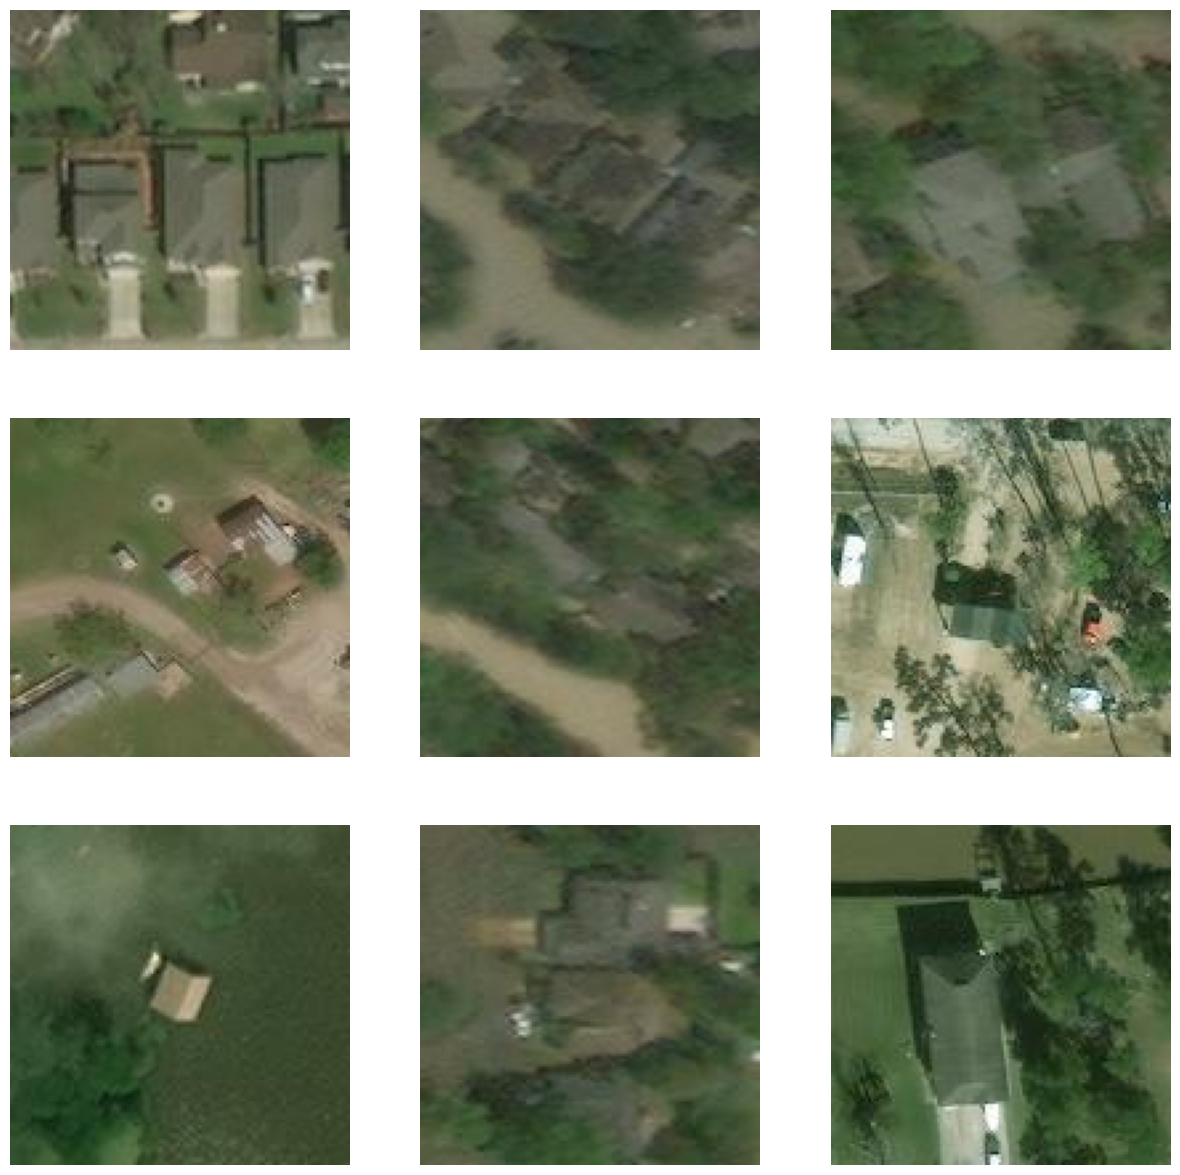

In [11]:
plt.figure(figsize=(15,15))
for images, labels in train_images:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        #plt.title(int(labels[i]))
        plt.axis("off")
    break

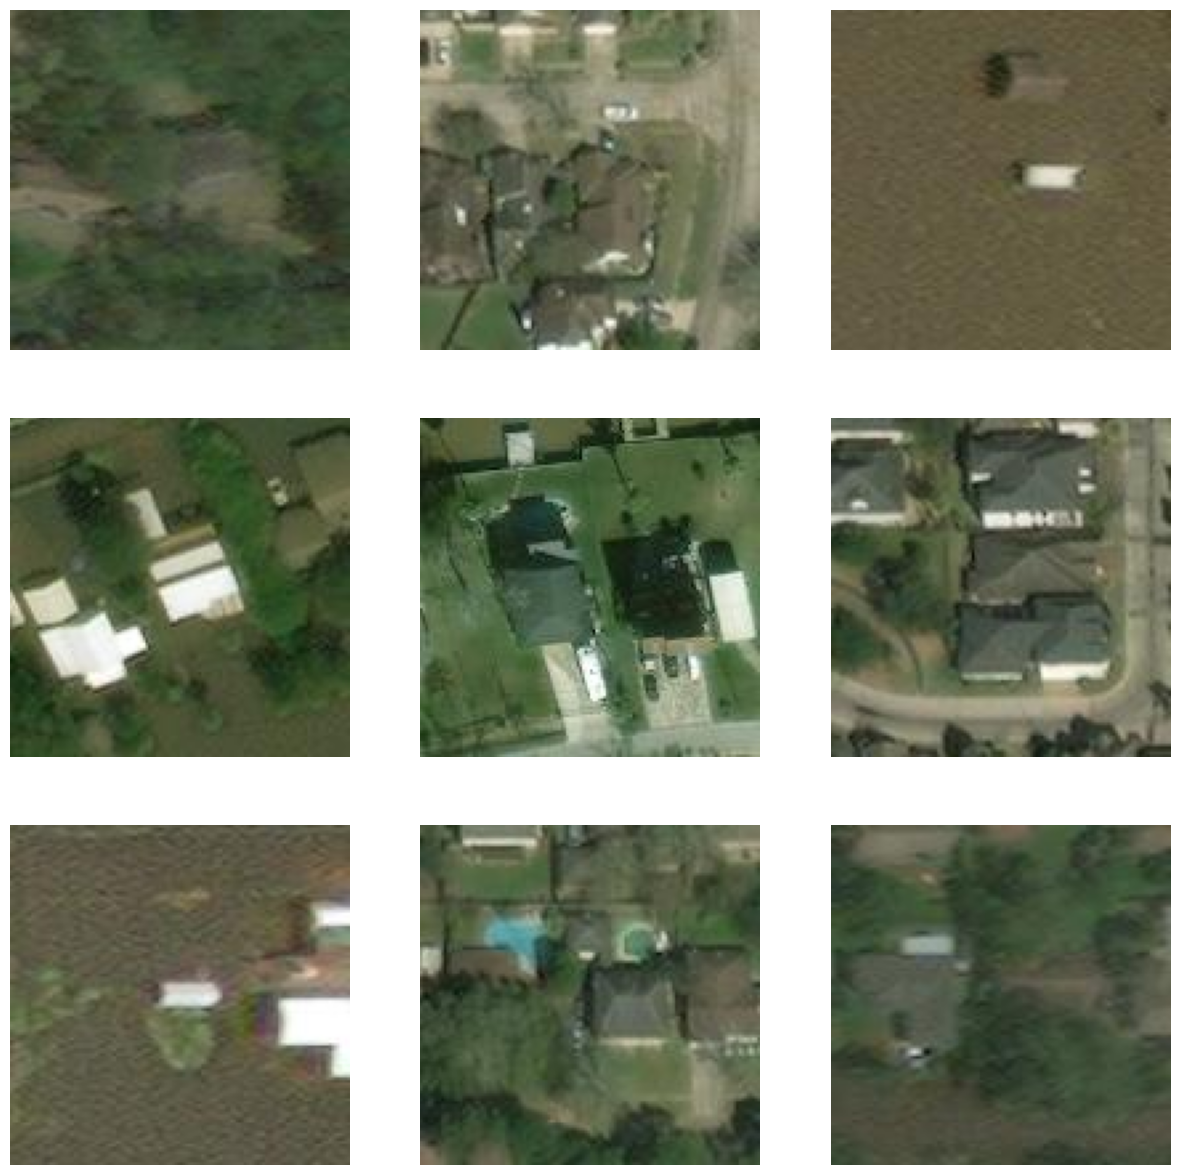

In [12]:
plt.figure(figsize=(15,15))
for images, labels in val_images:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        #plt.title(int(labels[i]))
        plt.axis("off")
    break

### Model

In [15]:
from keras.models import Sequential
from tensorflow import keras
from keras.layers import Flatten, Dense
from keras.applications import Xception

input_shape = (128,128,3)
ACTIVATION = 'relu'
PADDING = 'same'
DROPOUT_RATE = 0.1
EPSILON = 0.001
IMG_HEIGHT = 128
IMG_WIDTH = 128

xception = Xception(input_shape=(IMG_HEIGHT,IMG_WIDTH, 3), weights='imagenet', include_top=False)
# Freeze layers
for layer in xception.layers:
    layer.trainable = False

# Create a Sequential model
model = Sequential()
model.add(xception)
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adam(0.001),
              metrics=['accuracy',keras.metrics.Precision(),keras.metrics.Recall()])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 4, 4, 2048)        20861480  
                                                                 
 flatten_1 (Flatten)         (None, 32768)             0         
                                                                 
 dense_1 (Dense)             (None, 1)                 32769     
                                                                 
Total params: 20894249 (79.71 MB)
Trainable params: 32769 (128.00 KB)
Non-trainable params: 20861480 (79.58 MB)
_________________________________________________________________


In [16]:
history=model.fit(
    train_images,
    validation_data=val_images,
    epochs=EPOCHS,

    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=4,
            restore_best_weights=True
        ),
         tf.keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            patience=3
        )
    ]
)

Epoch 1/30
157/157 [==============================] - 22s 107ms/step - loss: 0.3502 - accuracy: 0.8635 - precision_1: 0.8721 - recall_1: 0.8520 - val_loss: 0.3823 - val_accuracy: 0.8770 - val_precision_1: 0.8378 - val_recall_1: 0.9350 - lr: 0.0010
Epoch 2/30
157/157 [==============================] - 18s 112ms/step - loss: 0.2436 - accuracy: 0.9070 - precision_1: 0.9143 - recall_1: 0.8982 - val_loss: 0.3423 - val_accuracy: 0.8815 - val_precision_1: 0.9320 - val_recall_1: 0.8230 - lr: 0.0010
Epoch 3/30
157/157 [==============================] - 15s 94ms/step - loss: 0.2058 - accuracy: 0.9225 - precision_1: 0.9295 - recall_1: 0.9144 - val_loss: 0.3008 - val_accuracy: 0.8915 - val_precision_1: 0.8812 - val_recall_1: 0.9050 - lr: 0.0010
Epoch 4/30
157/157 [==============================] - 15s 94ms/step - loss: 0.1745 - accuracy: 0.9339 - precision_1: 0.9396 - recall_1: 0.9274 - val_loss: 0.3103 - val_accuracy: 0.8945 - val_precision_1: 0.8739 - val_recall_1: 0.9220 - lr: 0.0010
Epoch 5/30

In [17]:
model.save('hurricane_xception.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


141/141 [==============================] - 15s 109ms/step - loss: 0.3146 - accuracy: 0.8951 - precision_1: 0.5159 - recall_1: 0.9070
test loss: 0.31459
test acc: 89.51
141/141 [==============================] - 12s 78ms/step


<function matplotlib.pyplot.show(close=None, block=None)>

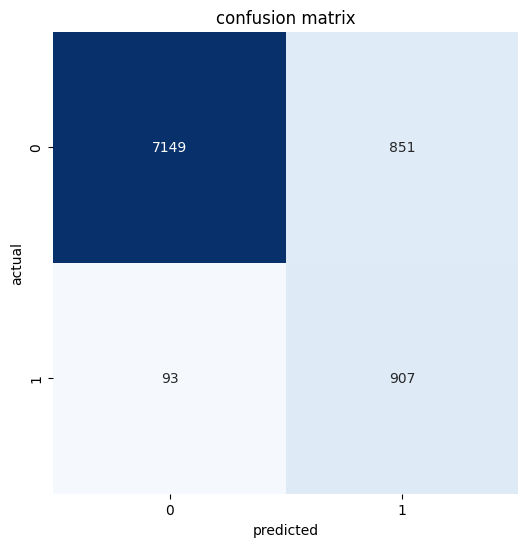

In [19]:
results=model.evaluate(test_images)
print("test loss: {:.5f}".format(results[0]))
print("test acc: {:.2f}".format(results[1]*100))
predictions=(model.predict(test_images)>=0.5).astype(int)
cm=confusion_matrix(test_images.labels,predictions,labels=[0,1])
plt.figure(figsize=(6,6))
sns.heatmap(cm,annot=True,fmt='g',vmin=0,cmap='Blues',cbar=False)
plt.xticks(ticks=[0.5,1.5],label=["no_damage","damage"])
plt.yticks(ticks=[0.5,1.5],label=["no_damage","damage"])
plt.xlabel("predicted")
plt.ylabel("actual")
plt.title("confusion matrix")
plt.show

In [20]:
results = model.evaluate(val_images,batch_size=16)
print("Loss:", results[0])
print("Accuracy:", results[1])
print("Precision:", results[2])
print("Recall:", results[3])

32/32 [==============================] - 3s 79ms/step - loss: 0.3008 - accuracy: 0.8915 - precision_1: 0.8812 - recall_1: 0.9050
Loss: 0.30081412196159363
Accuracy: 0.8914999961853027
Precision: 0.8812074065208435
Recall: 0.9049999713897705


In [21]:
results = model.evaluate(test_images,batch_size=16)
print("Loss:", results[0])
print("Accuracy:", results[1])
print("Precision:", results[2])
print("Recall:", results[3])

141/141 [==============================] - 11s 80ms/step - loss: 0.3146 - accuracy: 0.8951 - precision_1: 0.5159 - recall_1: 0.9070
Loss: 0.3145858645439148
Accuracy: 0.895111083984375
Precision: 0.5159271955490112
Recall: 0.9070000052452087


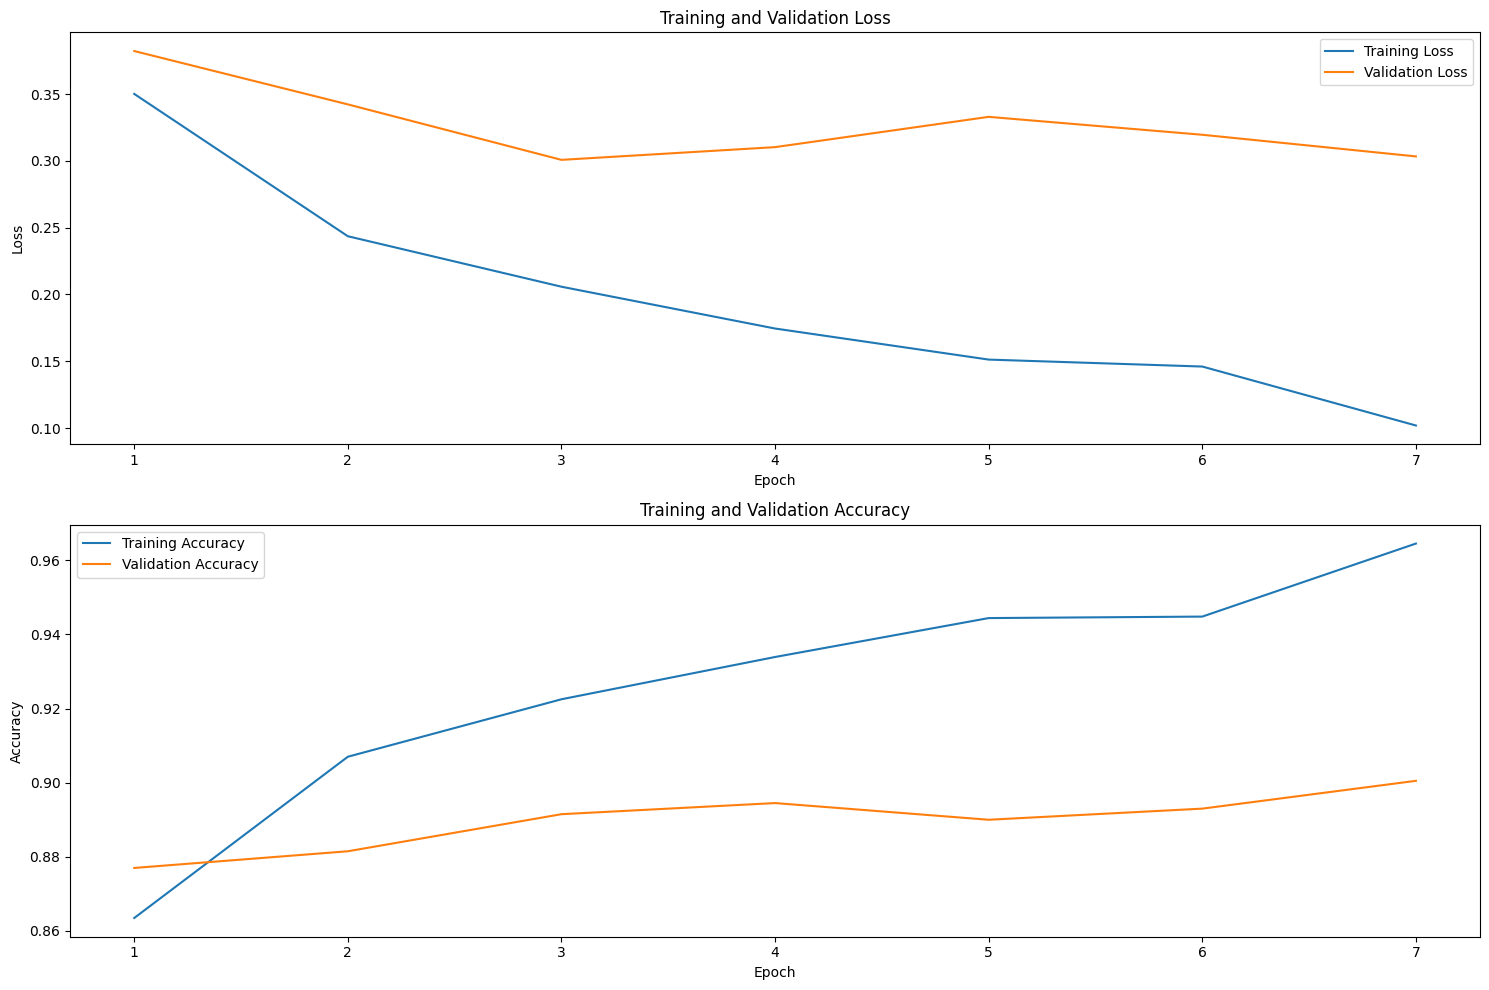

In [22]:
import matplotlib.pyplot as plt

# Assuming `history` contains the training history

# Extracting metrics
loss = history.history['loss']
accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

# Number of epochs
epochs = range(1, len(loss) + 1)

# Plotting subplots
plt.figure(figsize=(15, 10))

# Loss subplot
plt.subplot(2, 1, 1)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy subplot
plt.subplot(2, 1, 2)
plt.plot(epochs, accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

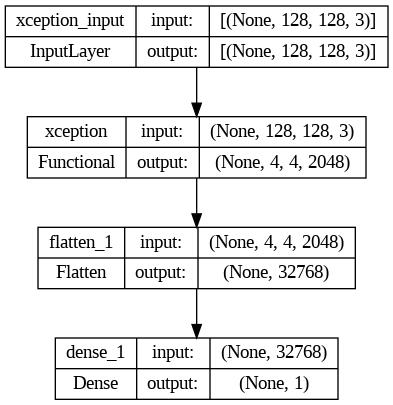

In [23]:
from keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

In [24]:
!pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 13.3 MB/s eta 0:00:00


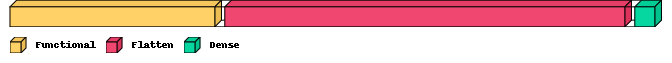

In [25]:
import visualkeras
visualkeras.layered_view(model, legend=True) # without custom font
from PIL import ImageFont
#font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(model, legend=True) # selected font